**Install Relevant Libraries and Mount Google Drive**

In [ ]:
#Add the link to the article here

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
#Import Relevant Libraries 
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from statistics import mean



**Import Data**

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
#Create a list of paths for all the image files containes in the 3 & 7 folders

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

threes, sevens 

((#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...],
 (#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.

In [ ]:
#Open an image from the list of images for the digit 7

img_path = sevens[4]
im3 = Image.open(img_path)
im3

**Pixel Similarity Classification Method**

In [ ]:
#Use the list of images to import the image arrays for 3's and 7's, 
#the arrays are converted to tensors

seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

len(three_tensors), len(seven_tensors)


(6131, 6265)

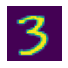

In [ ]:
#Test the import by displaying pne of the images using a FastAI Method
 
show_image(three_tensors[1])

In [ ]:
#Convert list of tensors to a three-dimensional tensor

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

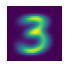

In [ ]:
#Find the ideal 3

ideal3 = stacked_threes.mean(0)
show_image(ideal3)

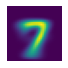

In [ ]:
#Find the ideal 7

ideal7 = stacked_sevens.mean(0)
show_image(ideal7)

**Test Pixel Similarity Method on a Validation Set**

In [ ]:
#Import the validation data. Convert the arrays to tensor and stack into a 3D

valid_3 = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3 = valid_3.float()/255

valid_7 = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7 = valid_7.float()/255

valid_3.shape,valid_7.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
#Function to calculate distance between the tensors of 2 images 

def mnist_distance(a,b):
  return (a-b).abs().mean((-1,-2))

#Function to determine if the image is closer to a 3 or a 7

def is_3 (x):
  return mnist_distance(x,ideal3) < mnist_distance(x,ideal7)


In [ ]:
#Apply the mnist distance across the validations set with broadcasting

#Classify all images in the 3 folder, we know all image here are 3 so the percentage of True predictions is the accuracy
accuracy_3s = is_3(valid_3).float().mean()

#Classify all images in the 7 folder, the function returns false for 7's so we invert the boolean and use the percentage of True predictions is the accuracy
accuracy_7s = (1-is_3(valid_7).float()).mean()

overall_accuracy = (accuracy_7s+accuracy_3s)/2

print("The accuracy for this method is: ", (100*overall_accuracy))

The accuracy for this method is:  tensor(95.1120)


**Partial pixel similarity using non-zero pixel values**

In [ ]:
#Splice out the bottom half of each image array in the training set

half_seven_tensors = []
half_three_tensors = []

for i in range(len(seven_tensors)):
  half_seven_tensors.append(seven_tensors[i][18:,4:22])

for i in range(len(three_tensors)):
  half_three_tensors.append(three_tensors[i][18:,4:22])

In [ ]:
#Count the number of non-zero pixels in the training images 

seven_non_zero = []
three_non_zero = []

for i in range(len(seven_tensors)):
   seven_non_zero.append(torch.count_nonzero(half_seven_tensors[i]))

for j in range(len(three_tensors)):
   three_non_zero.append(torch.count_nonzero(half_three_tensors[j]))

In [ ]:
#Find the average number of non-zero elements in the lower half of 3's and 7's in the training set

average_7 = float(sum(seven_non_zero)/len(seven_non_zero))
average_3 = float(sum(three_non_zero)/len(three_non_zero))

average_3,average_7

(55.027565002441406, 38.42793273925781)

**Test on a Validation Set**

Also try varying the splitting of the original images

In [ ]:
#Import validation set with the same split
three_valid = (path/'valid'/'3').ls().sorted()
seven_valid = (path/'valid'/'7').ls().sorted()


sevens_valid = [tensor(Image.open(o)) for o in seven_valid]
threes_valid = [tensor(Image.open(o)) for o in three_valid]

len(threes_valid), len(sevens_valid)


(1010, 1028)

In [ ]:
#Splice out the bottom half of each image array in the validation set

for i in range(len(sevens_valid)):
  seven_valid[i] = sevens_valid[i][18:,4:22]

for i in range(len(threes_valid)):
  three_valid[i] = threes_valid[i][18:,4:22]


In [ ]:
#Count the number of non-zero pixel values for each image in the validation set

valid3_non_zero = []
valid7_non_zero = []

for i in range(len(seven_valid)):
   valid7_non_zero.append(int(torch.count_nonzero(seven_valid[i])))

for j in range(len(three_valid)):
   valid3_non_zero.append(int(torch.count_nonzero(three_valid[j])))

In [ ]:
#Simple difference function to determine distance

def simp_diff(a,b):
  return abs(a-b)

#Function to decide if it's a 3 or not
def simp_is_3(x):
  return simp_diff(x,average_3) < simp_diff(x, average_7)

In [ ]:
#Apply distance functions to each value in the validation list and then compare the results 

#Classify all images in the 3 folder, we know all image here are 3 so the mean of True predictions is the accuracy
pred_3 = [simp_is_3(i) for i in valid3_non_zero]
pred_3_accuracy = mean(pred_3)

#Classify all images in the 7 folder, the function returns false for 7's so we invert the boolean and use the percentage of True predictions as the accuracy
pred_7 = [(1-simp_is_3(i)) for i in valid7_non_zero]
pred_7_accuracy = mean(pred_7)

avg_pred_accuracy = 0.5*(pred_3_accuracy + pred_7_accuracy)

In [ ]:
pred_3_accuracy, pred_7_accuracy

(0.7762376237623763, 0.8278210116731517)

In [ ]:
print("The accuracy for this method is: ", (100*avg_pred_accuracy))

The accuracy for this method is:  80.20293177177639


**Code Refactoring Point**